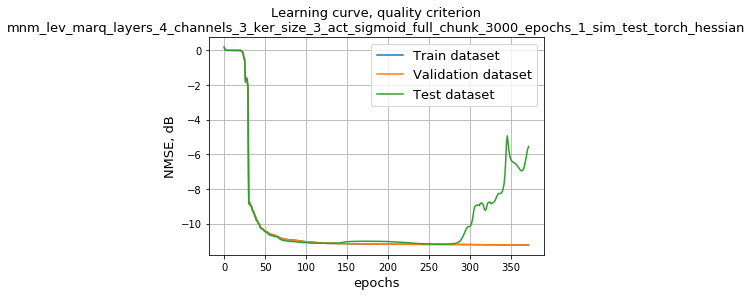

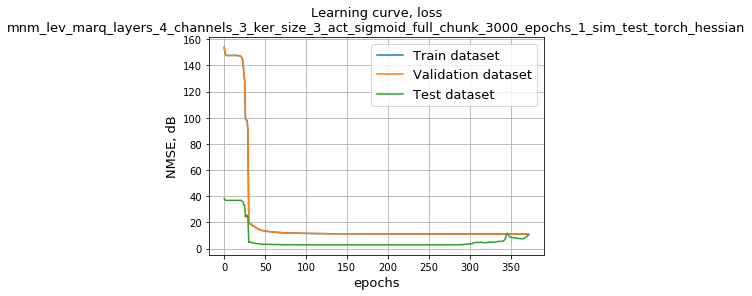

In [11]:
import os, sys

sys.path.append('../../')
from utils import plot_psd, nmse

%matplotlib inline
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Determine experiment name and create its directory
# exp_name = "mnm_damped_layers_4_channels_5_ker_size_5_act_sigmoid"
# exp_name = "newton_nev_marq_layers_4_channels_3_ker_size_3_act_sigmoid_full_chunk_1000_epochs"
# exp_name = "mnm_lev_marq_layers_4_channels_3_ker_size_3_act_sigmoid_full_chunk_3000_epochs_1_sim"
exp_name = "mnm_lev_marq_layers_4_channels_3_ker_size_3_act_sigmoid_full_chunk_3000_epochs_1_sim_test_torch_hessian"
# exp_name = "newton_nev_marq_layers_4_channels_3_ker_size_3_act_sigmoid_full_chunk_3000_epochs_1_sim"
# exp_name = "test"

add_folder = os.path.join("")
curr_path = os.getcwd()
load_path = os.path.join(curr_path, add_folder, exp_name)

# Load desired signal and model output
# desired = np.load(os.path.join(load_path, 'd.npy'))
# model_out = np.load(os.path.join(load_path, 'y.npy'))

# Calculate quality criterion
# NMSE = nmse(desired, desired - model_out)
# print(f"NMSE = {NMSE} dB")

# Plot learning curve for quality criterion
lc_test = np.load(os.path.join(load_path, "lc_qcrit_test_" + exp_name + ".npy"))
lc_validat = np.load(os.path.join(load_path, "lc_qcrit_validate_" + exp_name + ".npy"))
lc_train = np.load(os.path.join(load_path, "lc_qcrit_train_" + exp_name + ".npy"))
plt.figure(1)
plt.plot(lc_train)
plt.plot(lc_validat)
plt.plot(lc_test)
plt.xlabel("epochs", fontsize=13)
plt.ylabel("NMSE, dB", fontsize=13)
plt.title("Learning curve, quality criterion\n" + exp_name, fontsize=13)
plt.legend(['Train dataset', 'Validation dataset', 'Test dataset'], fontsize=13)
plt.grid()

# Plot learning curve on base of loss funciton
lc_test_loss = np.load(os.path.join(load_path, "lc_test_" + exp_name + ".npy"))
lc_validat_loss = np.load(os.path.join(load_path, "lc_validate_" + exp_name + ".npy"))
lc_train_loss = np.load(os.path.join(load_path, "lc_train_" + exp_name + ".npy"))
plt.figure(2)
plt.plot(lc_train_loss)
plt.plot(lc_validat_loss)
plt.plot(lc_test_loss)
plt.xlabel("epochs", fontsize=13)
plt.ylabel("NMSE, dB", fontsize=13)
plt.title("Learning curve, loss\n" + exp_name, fontsize=13)
plt.legend(['Train dataset', 'Validation dataset', 'Test dataset'], fontsize=13)
plt.grid()

# Plot PSD (Power Spectral Densities = Energy spectrum) of Error without pre-distortion (DPD) and with it.
# Error correspondce to deviation of PA output from DPD input. We try to minimize it.
# title = f"PSD \n" + exp_name
# legend = ["DPD error before training", "DPD error after training"]
# plot_psd(desired, desired - model_out, title=title, legend=legend)